# Numpy介绍
NumPy 是一个运行速度非常快的数学库，主要用于数组计算，包含：
+ 一个强大的**N维数组对象**ndarray
+ 广播功能函数
+ 整合 C/C++/Fortran 代码的工具
+ 线性代数、傅里叶变换、随机数生成等功能
---
# ndarray数组
+ ndarray是numpy中的<font color=red size=4> 多维数组对象 </font>，数组中的元素具有<font color=red size=4> 相同的类型 </font>，且可以被<font color=red size=4>索引</font>
## 什么是数组？
+ 数组是用于储存多个相同类型数据的数据容器。
### 为什么不是列表？
+ 术业有专攻，列表的设计方式不适合做“数据分析”
+ ndarray数组就是设计出来做“数据分析”：
 + 速度快（时间）
 + 占用内存小（空间）

 
## ndarray的设计哲学
ndarray的设计哲学在于数据存储与其解释方式的分离，或者说copy和view的分离，让尽可能多的操作发生在解释方式上(view上)，而尽量少地操作实际存储数据的内存区域。
+ ndarray由两部分构成：

 + 实际的数据
 + 描述这些数据的元数据（对数据的解释方式）
 
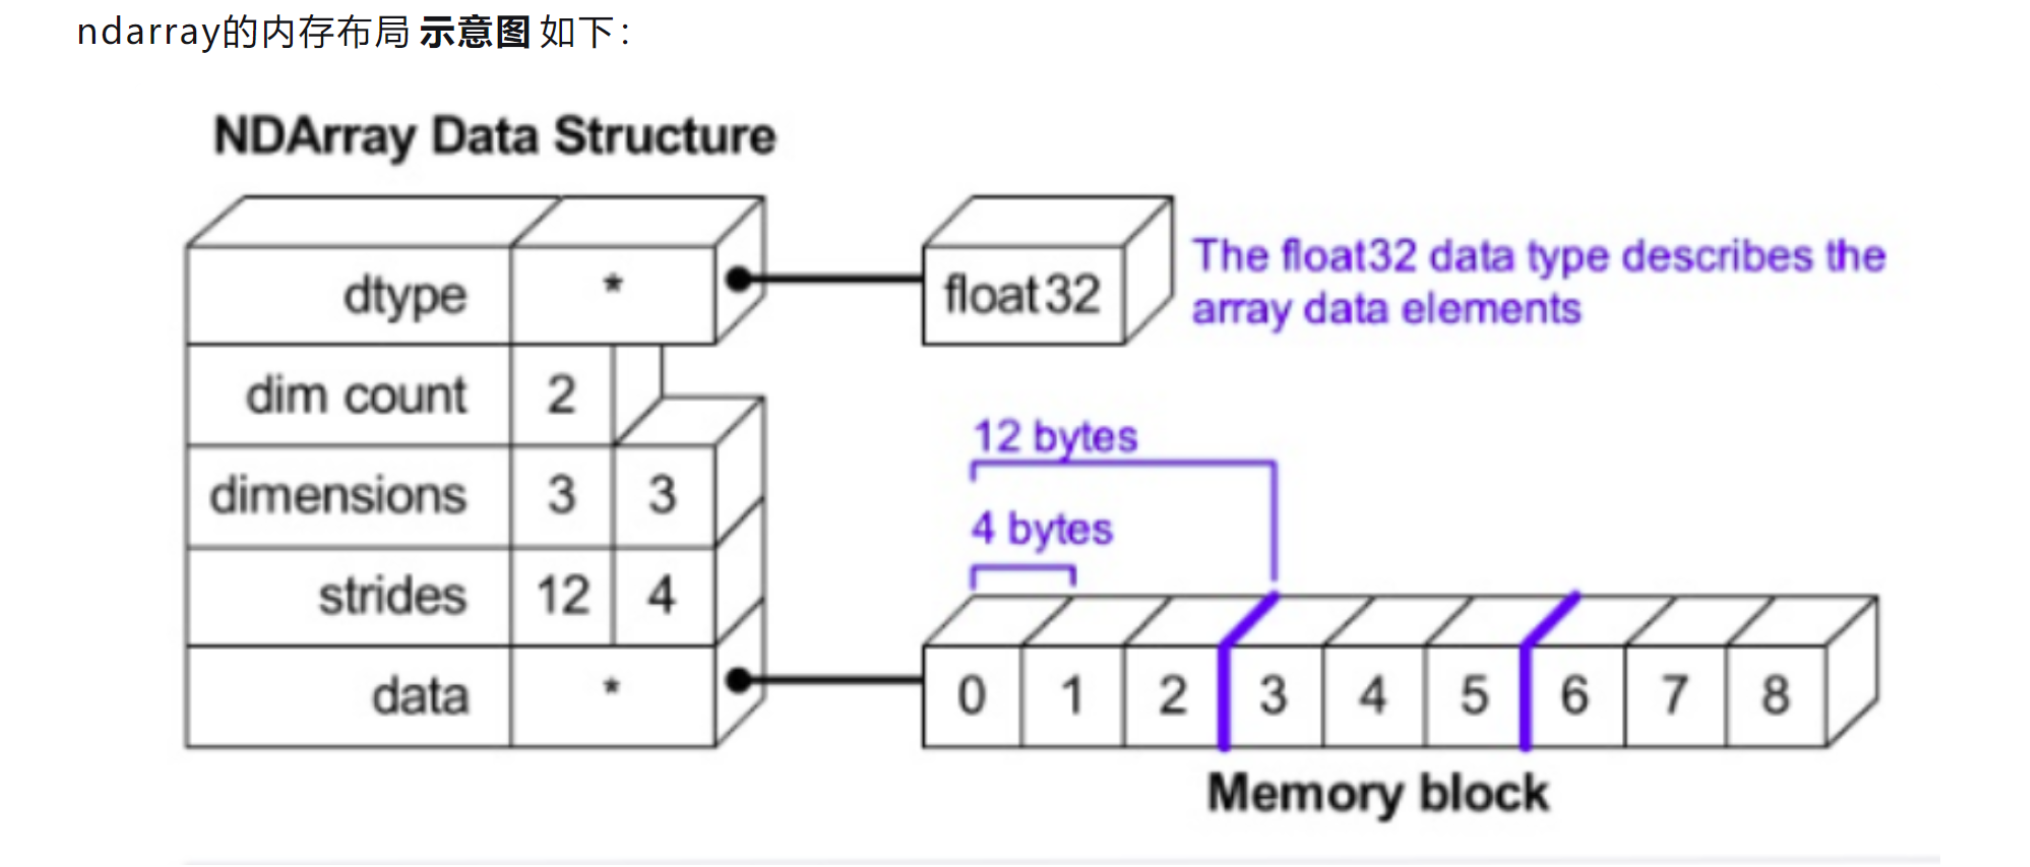
'
图中的四个元数据能够准确索引到指定位置的数据，以及这个数据如何解释（解释为整型or浮点型or???）

------





# ndarray对象的属性
+ 通过这些属性查看数组的维数、形状、元素类型等

| 属性 | 说明|
| :----: | :----:|
| .shape| 数组每一维度的数量|
| .ndim | 数组的维度|
| .size| 数组的元素总数|
| .dtype| 元素的数据类型|
| .itemsize | 数组中每个元素的大小，以字节为单位|
| .strides |维间距，即遍历数组时在每个维度上步进的字节元组|

In [1]:
# ndarray 的属性
import numpy as np 

# 创建一个 3 * 4 的二维数组
arr = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])

print("数组的内容：\n", arr)
print("元素的数据类型：", arr.dtype)
print("数组的形状：", arr.shape)  # 整数元组
print("数组的维度：", arr.ndim)  # 整数
print("数组的元素数量：", arr.size) # 整数
print("每个元素的大小：", arr.itemsize) #整数，以字节为单位
print("维度间距：", arr.strides) #整数元组，以字节为单位

# strides中的第一个参数(16) 代表第一个维度(行)之间相差的字节数 arr[0,0]和arr[1,0] 之间相差了 16 个字节
# strides中的第二个参数(4) 代表第二个维度(列)之间相差的字节数  arr[0,0]和arr[0,1] 之间相差了 4 个字节


数组的内容：
 [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
元素的数据类型： int32
数组的形状： (3, 4)
数组的维度： 2
数组的元素数量： 12
每个元素的大小： 4
维度间距： (16, 4)


# ndarray的数据类型及精度
前面已经提到，ndarray对象种存储的是同一类型的数据，ndarray中常见的数据类型如下图

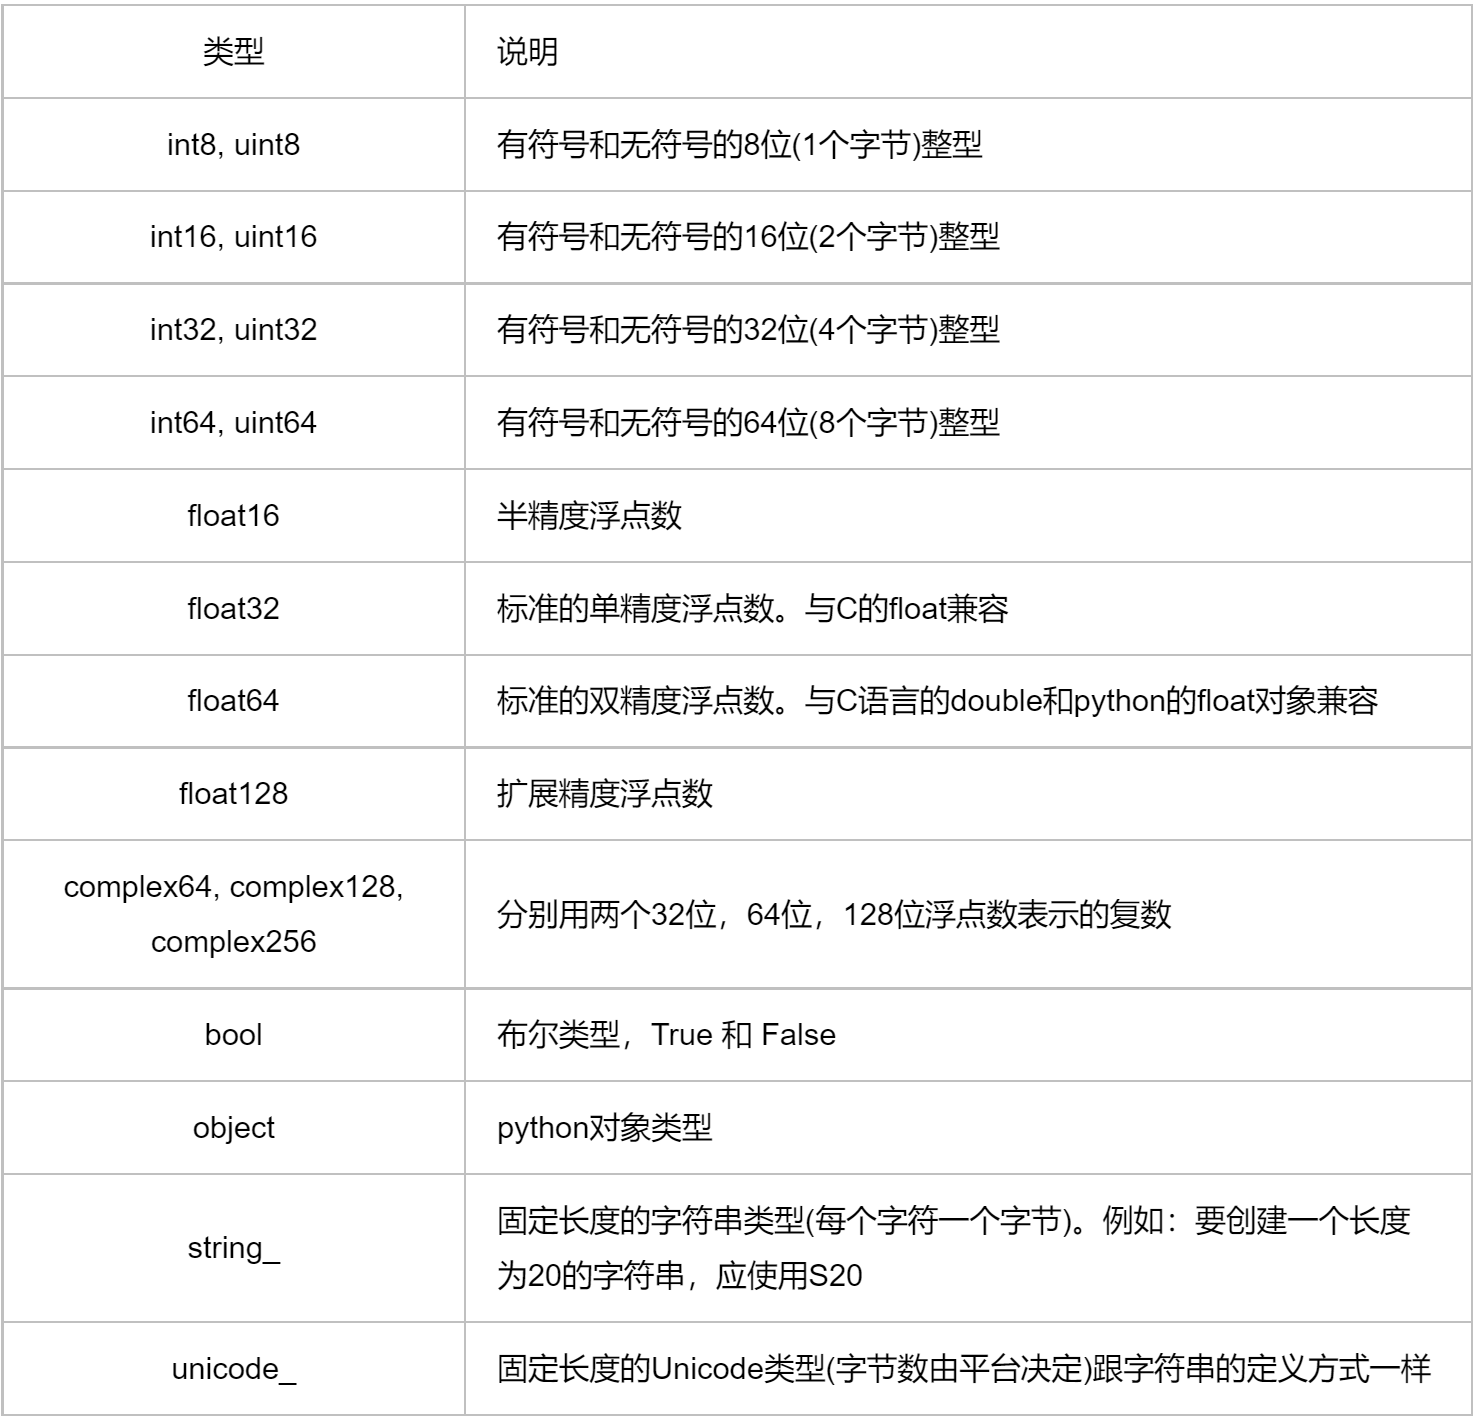
+ ndarray支持这么多种元素类型的原因
 + 科学计算涉及数据较多，对存储和性能都有较高要求。
 + 对元素类型精细定义，有助于NumPy合理使用存储空间并优化性能。
 + 对元素类型精细定义，有助于程序员对程序规模有合理评估。
+ 初学numpy，通常只需要关心数据的大类，比如浮点型、整数、布尔值等，当接触到大数据集时，就需要深入全面地考虑数据类型
---



# ndarray的创建
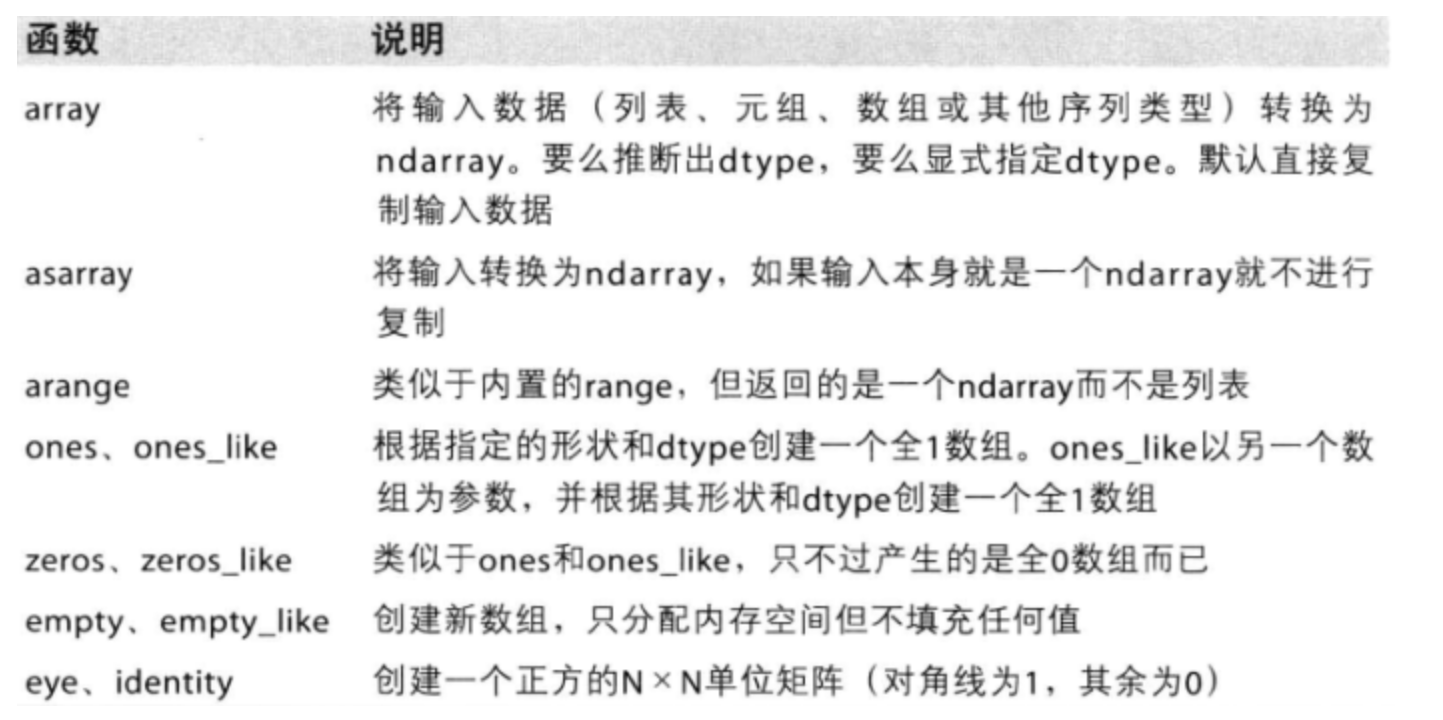

In [41]:
import numpy as np

# 最简单的方法使用array函数，传入一个序列即可，比如list：
data1 = ["ab11","bb","cb",1]
arr1 = np.array(data1)
arr1.dtype

dtype('<U11')

In [7]:
# 嵌套序列会被转换为多维数组
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
print(arr2)
print("arr2的维数:",arr2.ndim)
print("arr2的形状:",arr2.shape)
print("arr2的维间距",arr2.strides)

[[1 2 3 4]
 [5 6 7 8]]
arr2的维数: 2
arr2的形状: (2, 4)
arr2的维间距 (16, 4)


### asarray()函数

原型：numpy.asarray(object, dtype = None, order = None)

|参数|含义|
|:---:|:---:|
|object|必选,任意形式的输入参数，可以是，列表, 列表的元组, 元组, 元组的元组, 元组的列表，多维数组|
|dtype|可选，数据类型|
|order|可选，代表数组元素在内存中的存储方式，有"C"和"F"两个选项,分别是行优先和列优先|

### order参数：
+ order是指定索引与数组元素对应方式的一个参数，也就是决定了数组元素在内存中的存储方式。
+ 一共有两种存储方式：Column-major（列优先）和Row-major（行优先）。
 + Fortran语言是前者的代表（也就是说Fortran语言是用Column-major方式在内存中存储数据的）。
 + C语言是后者的代表。
+ NumPy中设置这个参数，目的是避免不同数据源（尤其是存储方式不同的）数据传递的时候出现存储错误。
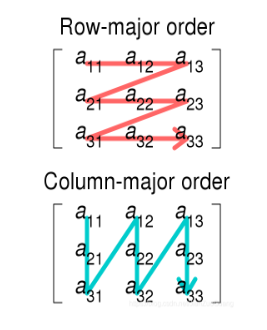

In [8]:
# asarray()函数
arr3C = np.asarray([[1,2,3],[4,5,6]],dtype='float32',order = "C")
print(arr3C.strides)
arr3F = np.asarray([[1,2,3],[4,5,6]],dtype='float32',order = "F")
print(arr3F.strides)

(12, 4)
(4, 8)


### arange()函数
原型：numpy.arange(start, stop, step, dtype)

作用：创建数值范围并返回 ndarray 对象，根据 start 与 stop 指定的范围以及 step 设定的步长，生成一个 ndarray。

|参数|含义|
|:----:|:----:|
|start|起始值，默认为0|
|stop|终止值（不包含）|
|step|步长，默认为1|
|dtype|返回ndarray的数据类型，如果没有提供，则会使用输入数据的类型|

In [16]:
arr4 = np.arange(1,10,2)
arr4

array([1, 3, 5, 7, 9])

### ones() / ones_like()  函数
### zeros() / zeros_like() 函数
### empty() / empty_like() 函数
### full() / full_like() 函数

### 上面几个函数用法相近，以full()和full_like() 为例进行演示

原型： numpy.full(shape, fill_value, dtype=None, order='C')  
作用：创建指定形状的数组，数组元素以参数fill_value来填充


In [17]:
# full()函数: 返回一个常数数组
arr5 = np.full((3,3),fill_value = 6,dtype = 'int32')
print(arr5)

# full_like()函数:返回一个与给定数组相同形状和类型的常数数组
arr6 = np.full_like(arr5,fill_value = 8)
print(arr6)

[[6 6 6]
 [6 6 6]
 [6 6 6]]
[[8 8 8]
 [8 8 8]
 [8 8 8]]


### eye() / identity()函数

原型：numpy.eye(N, M=None, k=0, dtype=float, order='C')

作用：返回一个N * N的单位矩阵


|参数|含义|
|:----:|:----:|
|N|行数量|
|M|列数量，可选，默认等于行数量|
|dtype|数据类型，可选|
|order|可选，有"C"和"F"两个选项,分别代表，行优先和列优先，在计算机内存中的存储元素的顺序|

In [18]:
arr7 = np.eye(5,6)
arr7

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.]])

# 视图（浅拷贝）Vs. 副本（深拷贝）

## 视图是对原数组的引用，或者自身没有数据，与原数组共享数据；
## 副本是对原数组的完整拷贝，虽然拷贝后的数组中的数据来自于原数组，但是它相对于原数组是独立的


+ Numpy中能够产生原数组<font color=red size=4> 视图 </font>的常见操作
 1. 对原数组的引用
 2. Numpy 的切片操作
 3. 调用view()函数
 4. 调用reshape()函数
+ Numpy中能够产生原数组<font color=red size=4> 副本 </font>的常见操作
 1. 神奇索引，例如a[[1, 2]]。
 2. 调用copy()函数


## 视图

In [29]:
import numpy as np

arr = np.arange(12)
view_of_arr = arr.view()
view_of_arr.shape = (3,4)
reshape_of_arr = arr.reshape(4,3)

print(arr)
print("+++++++++++++++++++++++++++++++++++++++++")
print(view_of_arr)
print(("+++++++++++++++++++++++++++++++++++++++++"))
print(reshape_of_arr)

[ 0  1  2  3  4  5  6  7  8  9 10 11]
+++++++++++++++++++++++++++++++++++++++++
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
+++++++++++++++++++++++++++++++++++++++++
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


In [30]:
arr[0] = 999

print("*****************************************")
print(arr)
print(("+++++++++++++++++++++++++++++++++++++++++"))
print(view_of_arr)
print(("+++++++++++++++++++++++++++++++++++++++++"))
print(reshape_of_arr)

*****************************************
[999   1   2   3   4   5   6   7   8   9  10  11]
+++++++++++++++++++++++++++++++++++++++++
[[999   1   2   3]
 [  4   5   6   7]
 [  8   9  10  11]]
+++++++++++++++++++++++++++++++++++++++++
[[999   1   2]
 [  3   4   5]
 [  6   7   8]
 [  9  10  11]]


 
## ndarray的设计哲学
ndarray的设计哲学在于数据存储与其解释方式的分离，或者说copy和view的分离，让尽可能多的操作发生在解释方式上(view上)，而尽量少地操作实际存储数据的内存区域。
+ ndarray由两部分构成：

 + 实际的数据
 + 描述这些数据的元数据（对数据的解释方式）
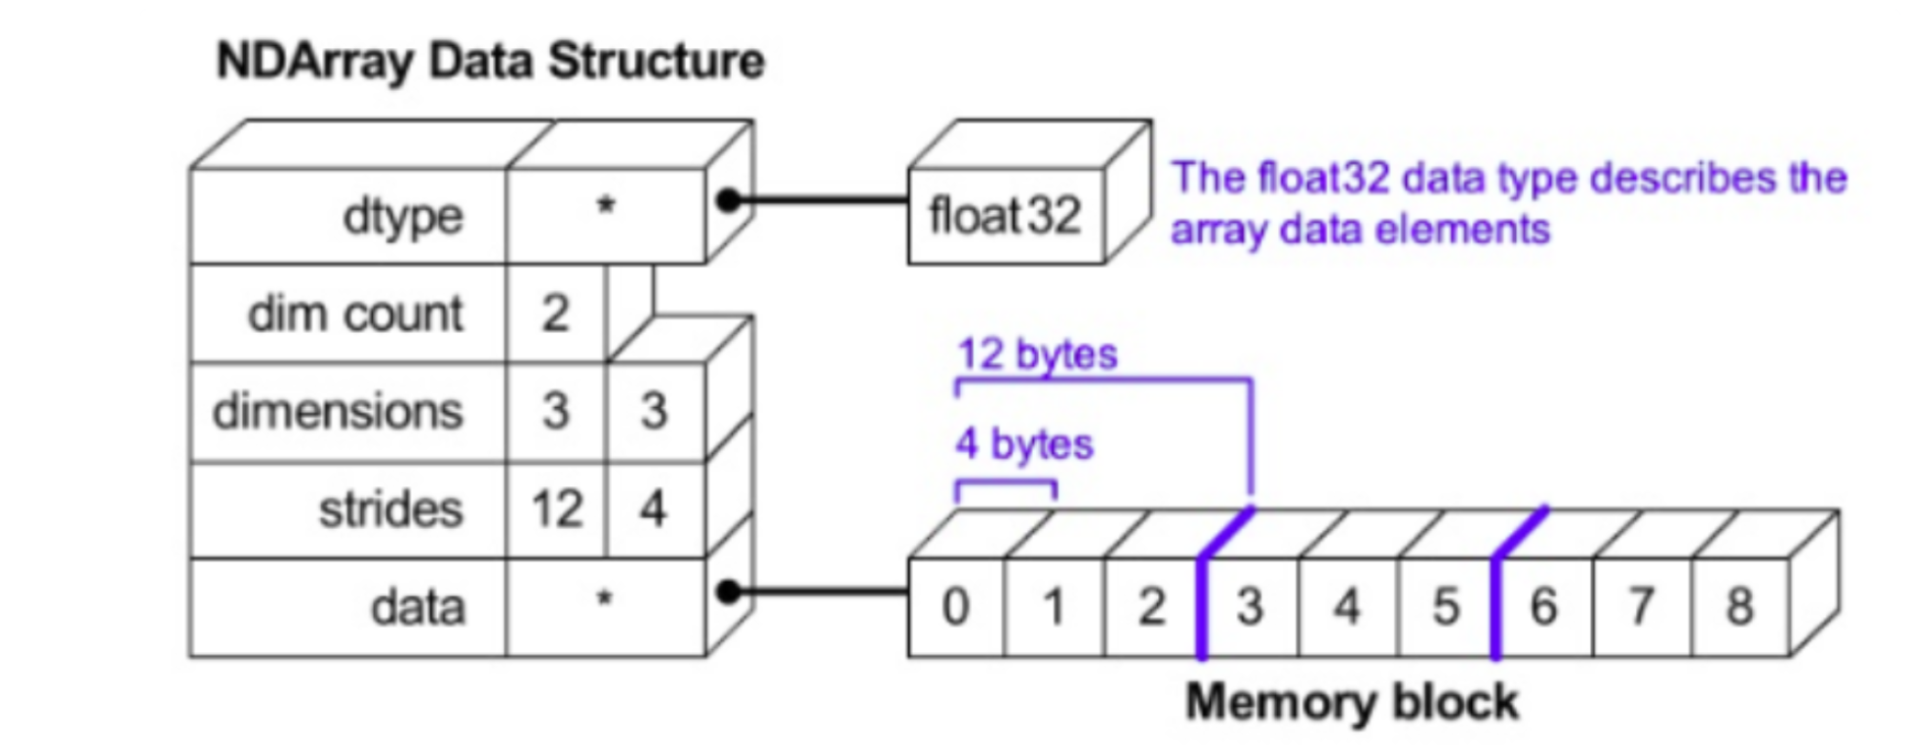

## 内存结构图
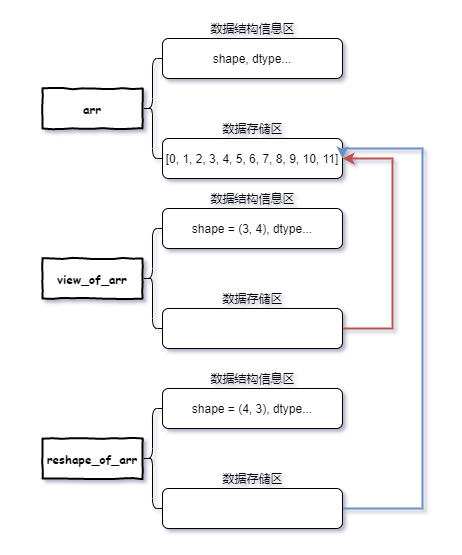


In [25]:
import sys

# 引入sys.getsizeof()函数，此函数可以直接得到每个数组所占内存空间的大小。
print(sys.getsizeof(arr))
print(sys.getsizeof(view_of_arr))
print(sys.getsizeof(reshape_of_arr))

4904
120
120


## 副本

In [26]:
import numpy as np

arr = np.arange(12)
copy_of_arr = arr.copy()
print(arr)
print("***************************************")
print(copy_of_arr)

[ 0  1  2  3  4  5  6  7  8  9 10 11]
***************************************
[ 0  1  2  3  4  5  6  7  8  9 10 11]


## 内存结构图
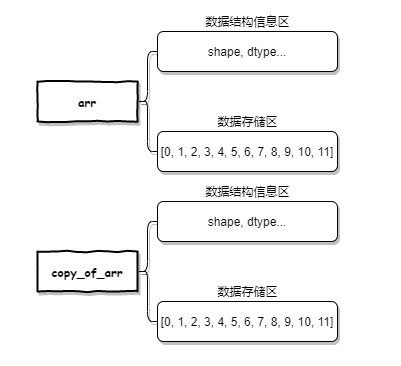

In [27]:
arr[0] = 666
print(arr)
print("***************************************")
print(copy_of_arr)
print("***************************************")
# 两个数组所占用内存大小
print(sys.getsizeof(arr))
print(sys.getsizeof(copy_of_arr))

[666   1   2   3   4   5   6   7   8   9  10  11]
***************************************
[ 0  1  2  3  4  5  6  7  8  9 10 11]
***************************************
152
152


## 小结
+ 视图也被称为浅拷贝，而副本被称为深拷贝
+ 视图和副本的主要区别在于，修改原数组，视图会受到影响，而副本不会受到影响；
+ Numpy中能够产生原数组视图的常见操作
 1. 对原数组的引用
 2. Numpy 的切片操作
 3. 调用view()函数
 4. 调用reshape()函数
+ Numpy中能够产生原数组副本的常见操作
 1. 神奇索引，例如a[[1, 2]]。
 2. 调用copy()函数

## 参考的文章
+ 理解numpy中ndarray的内存布局和设计哲学：https://www.cnblogs.com/shine-lee/p/12293097.html
+ Numpy为什么这么快-Memory与Strides： https://zhuanlan.zhihu.com/p/56684539
+ 详解 Numpy 中的视图与副本：https://zhuanlan.zhihu.com/p/199615109


In [22]:
## 几个改变数组形状的方法
arr = np.array([[1,2,3],[4,5,6],[7,8,9]]) # shape = (3,3)
# arr.reshape(2,3,3) # 会报错，ValueError
arr2 = np.tile(arr,(2,1,1))  # shape = (2,3,3) 瓷砖函数，会复制原数组
arr3 = np.zeros((2,3,3)) + arr # shape = (2,3,3)当两个维度不同的数组进行运算时也会触发广播机制,注意dtype会变化
arr.resize((2,3,3))  # 直接修改原数组，不足的元素用0补位
